# Import

In [3]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [4]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [5]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res
from io import BytesIO

# Example 1 : Show Heatmap of MAPE(%)  CB

Text(0.5, 1.0, 'Test Set')

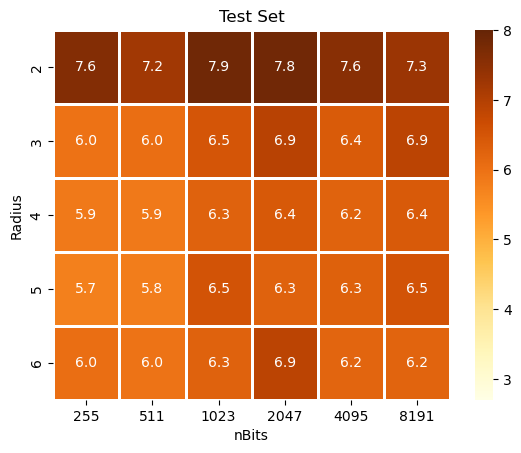

In [9]:
Text = "Test"; text_model = "CB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=8.0,vmax=3.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')


Text(0.5, 1.0, 'Train Set')

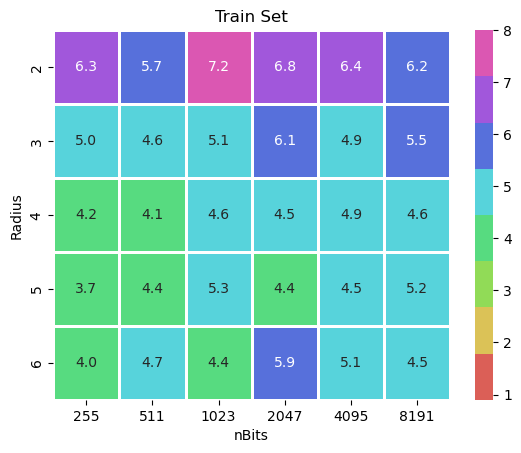

In [89]:
Text = "Train"; text_model = "CB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Total Set')

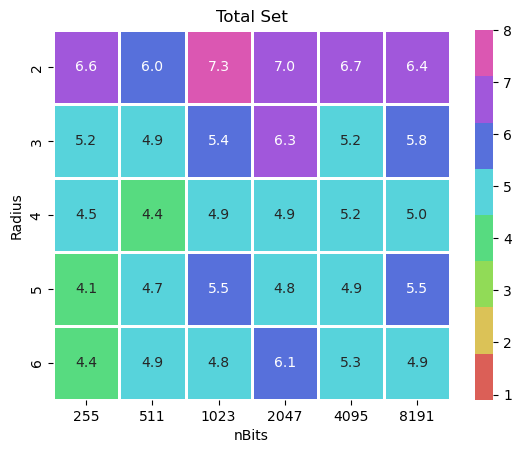

In [90]:
Text = "Total"; text_model = "CB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

# Example 2 : Show Heatmap of MAPE(%)  RF

Text(0.5, 1.0, 'Test Set')

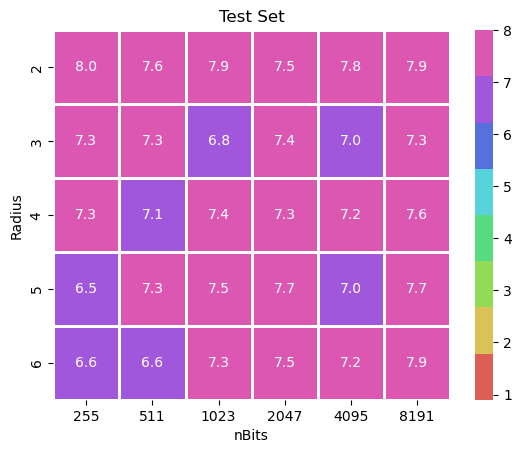

In [91]:
Text = "Test"; text_model = "RF"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Train Set')

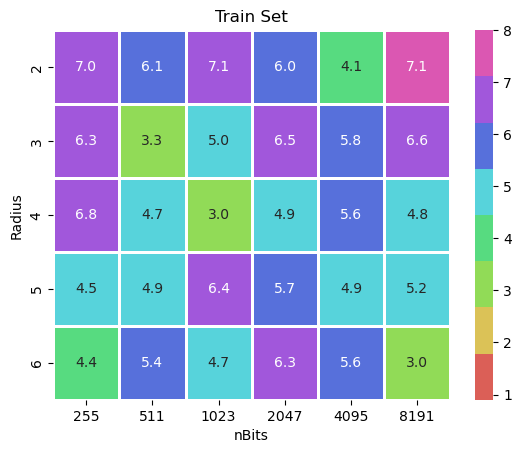

In [92]:
Text = "Train"; text_model = "RF"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Total Set')

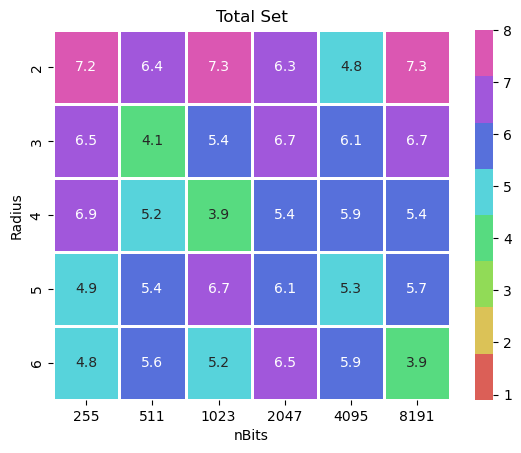

In [93]:
Text = "Total"; text_model = "RF"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

# Example 3 : Show Heatmap of MAPE(%)  XGB

Text(0.5, 1.0, 'Test Set')

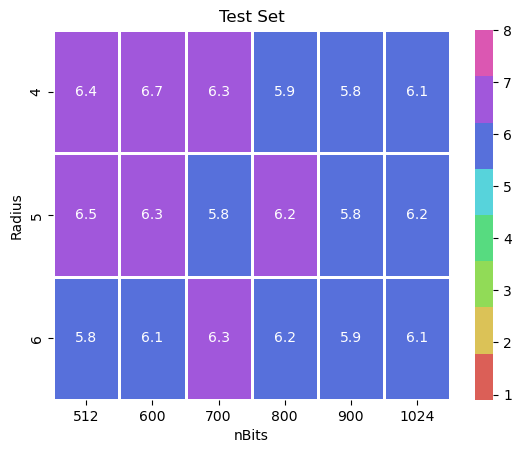

In [94]:
Text = "Test"; text_model = "XGB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Train Set')

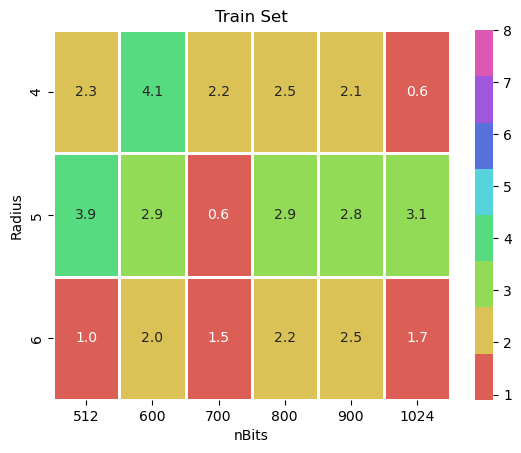

In [95]:
Text = "Train"; text_model = "XGB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Total Set')

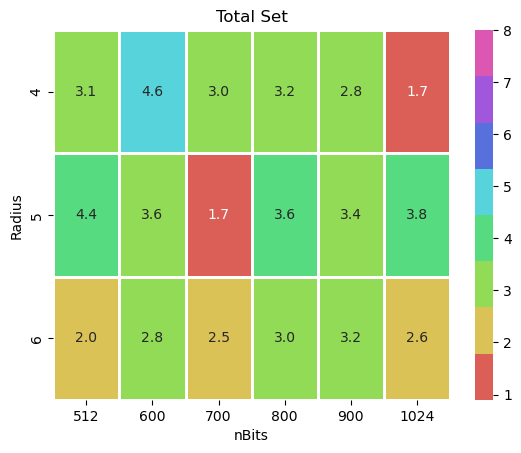

In [96]:
Text = "Total"; text_model = "XGB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

# Example 4 : Show Heatmap of MAPE(%)  Ridge

Text(0.5, 1.0, 'Test Set')

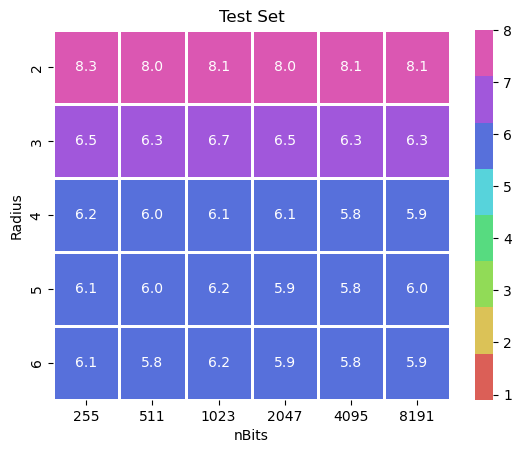

In [97]:
Text = "Test"; text_model = "Ridge"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Train Set')

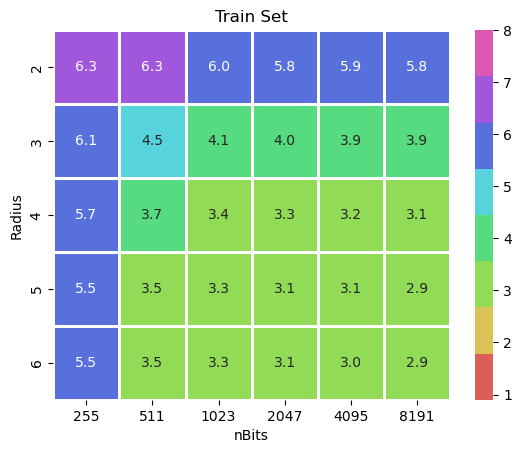

In [98]:
Text = "Train"; text_model = "Ridge"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

Text(0.5, 1.0, 'Total Set')

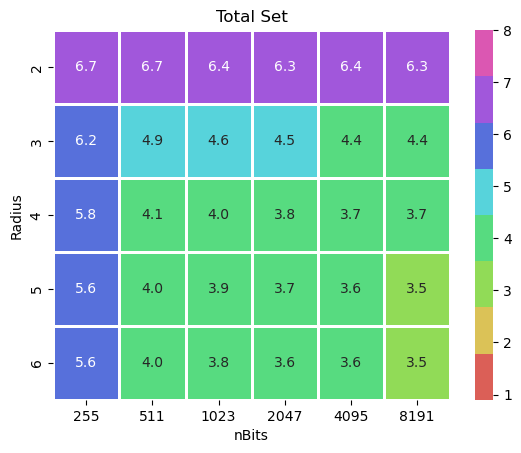

In [99]:
Text = "Total"; text_model = "Ridge"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("hls", 8),
           vmin=8.0,vmax=1.0,
           fmt=".1f", annot = True)
plt.title(f'{Text} Set')

# Visual

<Axes: title={'center': 'CB'}, xlabel='nBits', ylabel='Radius'>

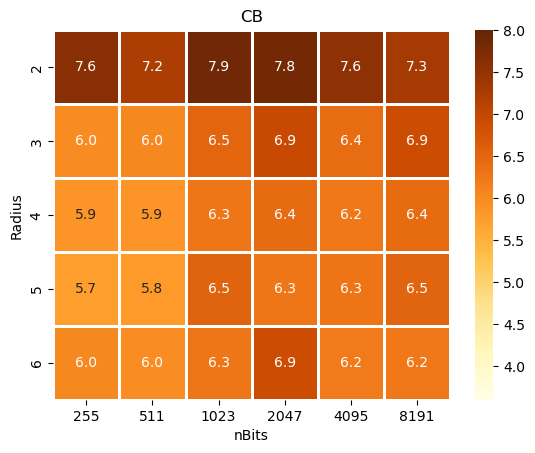

In [29]:
Text = "Test"; text_model = "CB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g1 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=8.0,vmax=4.0,
           fmt=".1f", annot = True)
plt.title(f'{text_model}')
g1

<Axes: title={'center': 'RF'}, xlabel='nBits', ylabel='Radius'>

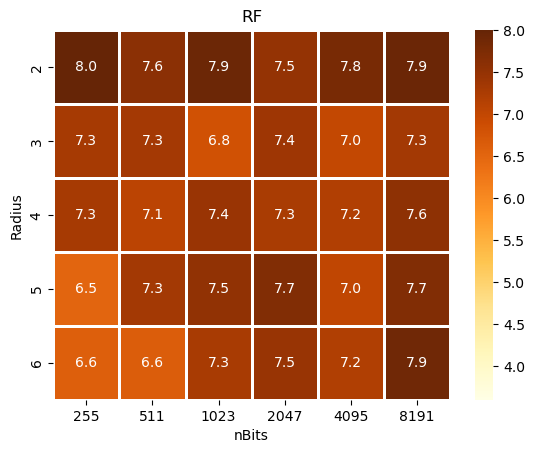

In [30]:
Text = "Test"; text_model = "RF"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g2 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=8.0,vmax=4.0,
           fmt=".1f", annot = True)
plt.title(f'{text_model}')
g2

<Axes: title={'center': 'XGB'}, xlabel='nBits', ylabel='Radius'>

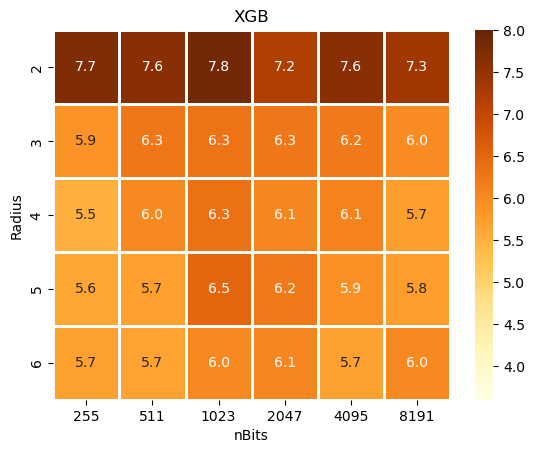

In [31]:
Text = "Test"; text_model = "XGB"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g3 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=8.0,vmax=4.0,
           fmt=".1f", annot = True)
plt.title(f'{text_model}')
g3

<Axes: title={'center': 'Ridge'}, xlabel='nBits', ylabel='Radius'>

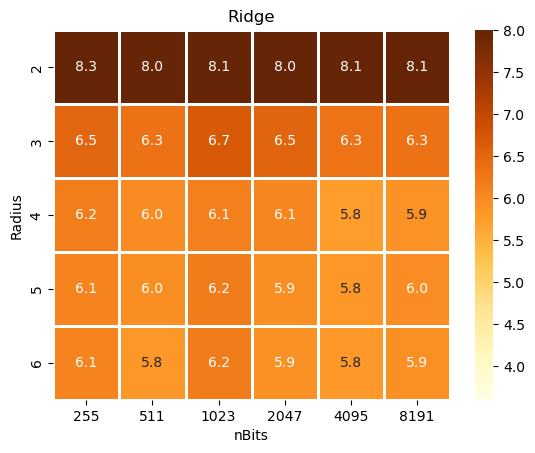

In [32]:
Text = "Test"; text_model = "Ridge"

df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]

new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g4 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=8.0,vmax=4.0,
           fmt=".1f", annot = True)
plt.title(f'{text_model}')
g4

C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\1475008642.py:5: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2)


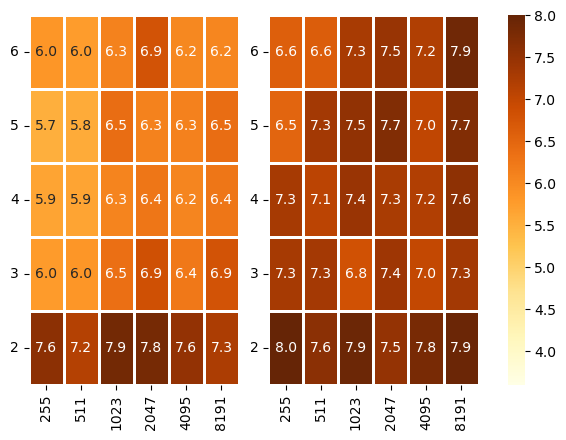

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax2)

Text = "Test"; text_model = "CB"
df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]
new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g1 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=4.0,vmax=8.0,
           fmt=".1f", annot = True,
                ax=ax1,cbar=False)
g1.invert_yaxis()

Text = "Test"; text_model = "RF"
df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]
new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g2 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=8.0,vmax=4.0,
           fmt=".1f", annot = True,
                ax=ax2,cbar_ax=axcb)
g2.invert_yaxis()

g1.set_ylabel('')
g1.set_xlabel('')

g2.set_ylabel('')
g2.set_xlabel('')

for ax in [g1,g2]:
    tl = ax.get_xticklabels()
   # ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()



C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\91448379.py:5: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2)
C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\91448379.py:6: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax3.get_shared_y_axes().join(ax4)
C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\91448379.py:7: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axcb.get_shared_y_axes().join(axcb2)


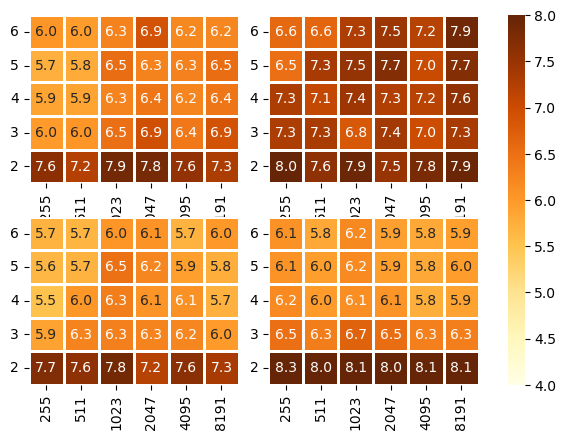

<Figure size 1000x1000 with 0 Axes>

In [130]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
f,((ax1,ax2, axcb),(ax3,ax4, axcb2)) = plt.subplots(2,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax2)
ax3.get_shared_y_axes().join(ax4)
axcb.get_shared_y_axes().join(axcb2)
gs = axcb2.get_gridspec()
axcb2.remove()
axcb.remove()
axbig = f.add_subplot(gs[0:, -1])




Text = "Test"; text_model = "CB"
df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]
new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g1 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=4.0,vmax=8.0,
           fmt=".1f", annot = True,
                ax=ax1,cbar=False)
g1.invert_yaxis()

Text = "Test"; text_model = "RF"
df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]
new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g2 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=4.0,vmax=8.0,
           fmt=".1f", annot = True,
                ax=ax2,cbar=False)
g2.invert_yaxis()

Text = "Test"; text_model = "XGB"
df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]
new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g3 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=4.0,vmax=8.0,
           fmt=".1f", annot = True,
                ax=ax3,cbar=False)
g3.invert_yaxis()

Text = "Test"; text_model = "Ridge"
df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model","Radius", "nBits", "MAPE(%)"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == text_model]
new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
g4 = sns.heatmap(new_df, linecolor="white", linewidth=2, cmap=sns.color_palette("YlOrBr", as_cmap=True),
           vmin=4.0,vmax=8.0,
           fmt=".1f", annot = True,
                ax=ax4,cbar_ax=axbig)
g4.invert_yaxis()

g1.set_ylabel('')
g1.set_xlabel('')
g2.set_ylabel('')
g2.set_xlabel('')
g3.set_ylabel('')
g3.set_xlabel('')
g4.set_ylabel('')
g4.set_xlabel('')

for ax in [g1,g2,g3,g4]:
    tl = ax.get_xticklabels()
   # ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
fig = plt.figure(figsize=(10,10))
fig.set_dpi(100)
plt.show()



# Function

In [172]:
annot_status = False
Line_status = 0
def Plot_heatmap(Text, text_model, ax_in):
    df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
    df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", "MAPE(%)"]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
    g = sns.heatmap(new_df, linecolor="white", linewidth=Line_status, cmap=sns.color_palette("YlOrBr", as_cmap=True),
               vmin=4.0,vmax=8.0,
               fmt=".1f", annot = annot_status
    ,                    ax=ax_in,cbar=False)
    g.invert_yaxis()
    g.get_xaxis().set_visible(False)
    g.set_title(f"{text_model}")
    return g
def Plot_heatmap_2(Text, text_model, ax_in):
    df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
    df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", "MAPE(%)"]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
    g = sns.heatmap(new_df, linecolor="white", linewidth=Line_status, cmap=sns.color_palette("YlOrBr", as_cmap=True),
               vmin=4.0,vmax=8.0,
               fmt=".1f", annot = annot_status
    ,                    ax=ax_in,cbar=False)
    g.invert_yaxis()
    #g.get_xaxis().set_visible(False)
    g.set_title(f"{text_model}")
    return g
def Plot_heatmap_final(Text, text_model, ax_in, axcb_in):
    df = pd.read_excel("../../NEW/B-MF 560point All score.xlsx",sheet_name=f"{Text}")
    df2 = df.copy().drop(columns={"DataType", "MAE", "RMSE", "R2"})
    column_names = ["Model","Radius", "nBits", "MAPE(%)"]
    df3 = df2.reindex(columns=column_names)
    df4 = df3[df3.Model == text_model]
    new_df = df4.pivot_table(index="Radius", columns="nBits", values="MAPE(%)")
    g = sns.heatmap(new_df, linecolor="white", linewidth=Line_status, cmap=sns.color_palette("YlOrBr", as_cmap=True),
               vmin=4.0,vmax=8.0,
               fmt=".1f", annot = annot_status
    ,                    ax=ax_in,cbar_ax=axcb_in)
    g.set_title(f"{text_model}")
    g.invert_yaxis()
    return g

# Final_Code

C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\684521785.py:4: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2)
C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\684521785.py:5: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax3.get_shared_y_axes().join(ax4)
C:\Users\Kan\AppData\Local\Temp\ipykernel_15460\684521785.py:6: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axcb.get_shared_y_axes().join(axcb2)


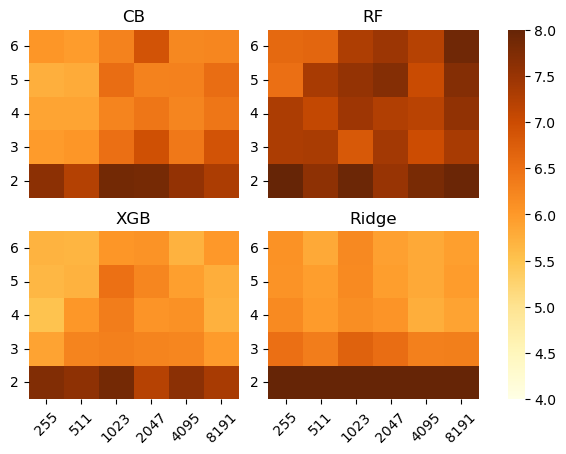

<Figure size 1000x1000 with 0 Axes>

In [173]:
import seaborn as sns
f,((ax1,ax2, axcb),(ax3,ax4, axcb2)) = plt.subplots(2,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax2)
ax3.get_shared_y_axes().join(ax4)
axcb.get_shared_y_axes().join(axcb2)
gs = axcb2.get_gridspec()
axcb2.remove()
axcb.remove()
axbig = f.add_subplot(gs[0:, -1])

g1=Plot_heatmap("Test", "CB", ax1)
g2=Plot_heatmap("Test", "RF", ax2)
g3=Plot_heatmap_2("Test", "XGB", ax3)
g4=Plot_heatmap_final("Test", "Ridge", ax4, axbig)

for ax in [g1,g2,g3,g4]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=45)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
fig = plt.figure(figsize=(10,10))
fig.set_dpi(100)
plt.show()

